#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 1 (20 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A0_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 218200403

# Student name: Muhammad Kazim




##**Background**
Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
##**Dataset**
**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers




##**Part-1: Basic Calculations:**  *(8 marks: 8 questions x 1 marks each)*


1.   Find the distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
original_data=pd.read_csv('housing_dataset.csv')
data=original_data.copy()

In [18]:
#The distance formula used below will calculate distance in kilometers and the difference between 02 points will be in km's
#The distance funtion take 04 values as inputs i.e. lat1, long1, lat2 and long2 and give output in km
def distance(x1,y1,x2,y2):
    Dist=1.6*(math.sqrt((69.464*(x1-x2))**2+(69.464*(y1-y2)*math.cos(x2*0.01745))**2))
    return(Dist)
Distance_km=[]

start_long=data.longitude[0]
start_lat=data.latitude[0]

for i in data.itertuples(index=False):
    Distance_km.append(distance(start_lat, start_long, i.latitude, i.longitude))

Distance_km.sort()
length = len(Distance_km)
#The nearest housing block from the 1st location will be 2nd point as the function starts calculating distance from itself 
print("Smallest Distance(km) from the 1st Housing is",Distance_km[1],"km") 
print("Highest Distance(km) from the 1st Housing is",Distance_km[length-1],"km") 


#--------------------------------------#
#data['Distance_km'] = Distance_km
#smallest_dist=data.Distance_km.nsmallest(2).iloc[-1]
#highest_dist=data.Distance_km.max()
#print("Smallest Distance(km) from the 1st Housing", smallest_dist)
#print("Highest Distance(km) from the 1st Housing", largest_dist) 

#--------------------------------------#


Smallest Distance(km) from the 1st Housing is 0.8773303603429851 km
Highest Distance(km) from the 1st Housing is 913.0356340748763 km


2.   Calculate the average age of the house blocks near the ocean.

In [20]:
avg_house_age=data.loc[data['ocean_proximity']=='NEAR OCEAN']
avg_house_age['housing_age'].mean()

29.347253574115875

3.   Find the income of the housing block with the most and least population density (per family).

In [21]:
#Ideally Population density is calculated as population per sq km but here we are calculating number of people per family 
#Adding a new column Population density in out Dataset as this will be used again later
data['Population_density']=(data.population/data.families)
Min_pop_density=(data[data.Population_density==data.Population_density.min()])
Max_pop_density=(data[data.Population_density==data.Population_density.max()])
#Displaying income for Maximum and Minimum populated housings
print(Max_pop_density["average_income"])
print(Min_pop_density["average_income"])

19006    10.2264
Name: average_income, dtype: float64
11849    2.5893
Name: average_income, dtype: float64


4.   Calculate the price difference between the latest and oldest housing block from the dataset.

In [22]:
Housing_latest=(data[data.housing_age == data.housing_age.min()]) 
Housing_oldest=(data[data.housing_age == data.housing_age.max()]) 
df_1=pd.DataFrame(Housing_latest)
df_2=pd.DataFrame(Housing_oldest)
#As we have multiple housing of the same age in both latest and oldest housings, taking avg. value for house price for price diff
diff_price=df_2['house_value'].mean()-df_1['house_value'].mean()
print(diff_price)
print("The value shows that on avgerage oldest housing block is $1,31,120.88 expensive than the latest housing blocks")

131120.87117046345
The value shows that on avgerage oldest housing block is $1,31,120.88 expensive than the latest housing blocks


5.   Calculate the cheapest price per room from the dataset.

In [23]:
data['Price_per_room']=(data.house_value/data.total_rooms)
data['Price_per_room'].min()

1.595444807757357

6.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

In [24]:
#Calculating wealthy house blocks in terms of house value
Most_wealthy_housing=(data[data.house_value == data.house_value.max()]) 
Least_wealthy_housing=(data[data.house_value == data.house_value.min()])
print("Average Population density for Most wealthyhousing ",Most_wealthy_housing["Population_density"].mean())
print("Average Population density for Most wealthyhousing ",Least_wealthy_housing["Population_density"].mean())
#Taking mean values as there are multiple entries of same values

Average Population density for Most wealthyhousing  2.5704420688088345
Average Population density for Most wealthyhousing  2.566439523605762


7.   Calculate and print the total housing blocks located in the same place.

In [25]:
#Housing blocks located in the same place can be assumed by Ocean proximity category as its grouping the housing by place
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

8.   Calculate the price of expensive room grouped by ocean proximity.

In [26]:
data.groupby('ocean_proximity').Price_per_room.max()

ocean_proximity
<1H OCEAN     22500.000000
INLAND        68750.000000
ISLAND          451.807229
NEAR BAY      62500.125000
NEAR OCEAN    23333.333333
Name: Price_per_room, dtype: float64

##**Part-2: Visualization:**  *(6 marks: 3 question x 2 marks each)*


1.   Draw the population scatter plot against housing age and another against ocean proximity. From the graph conclude an assumption.

The plot shows that there is a slight negative correlation between house age and population

As the house age is increasing, Population is decreasing, so we can conclude that new housing are more populated



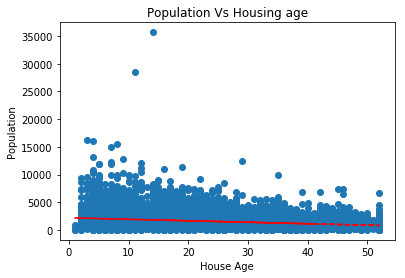

<Figure size 432x288 with 0 Axes>

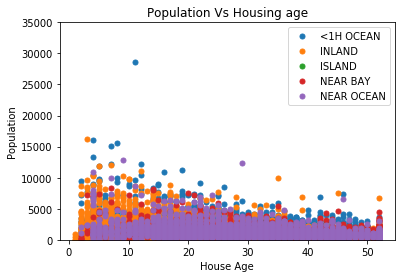

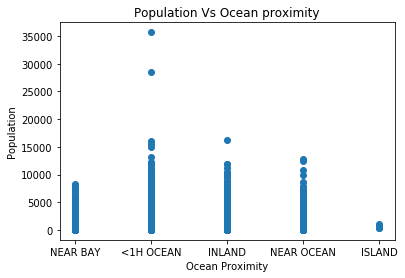

The plot shows that how population is distributed between housing locations according to ocean proximity

Housings <1H, Inland and Near Ocean are more populated,whereas Near bay and Island are less populated


In [27]:
plt.figure(1)
plt.plot(data["housing_age"], data["population"],"o")
line = np.polyfit(data["housing_age"], data["population"], 1)
p_line = np.poly1d(line)
plt.plot(data["housing_age"],p_line(data["housing_age"]),"r--")
print("The plot shows that there is a slight negative correlation between house age and population\n")
print("As the house age is increasing, Population is decreasing, so we can conclude that new housing are more populated\n")
plt.xlabel('House Age')
plt.ylabel('Population')
plt.title('Population Vs Housing age')

plt.figure(3)
#data.plot(kind='scatter', x='housing_age', y='population')
fig, ax = plt.subplots()
groups = data.groupby('ocean_proximity')
for name, group in groups:
    ax.plot(group.housing_age, group.population, marker='o', linestyle='', ms=5,label=name)
ax.legend(numpoints=1)
ax.set_ylim((0, 35000))
plt.xlabel('House Age')
plt.ylabel('Population')
plt.title('Population Vs Housing age')

plt.figure(2)
plt.plot(data["ocean_proximity"], data["population"],"o")
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.title('Population Vs Ocean proximity')

plt.show()
print("The plot shows that how population is distributed between housing locations according to ocean proximity\n")
print("Housings <1H, Inland and Near Ocean are more populated,whereas Near bay and Island are less populated")



2.  Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

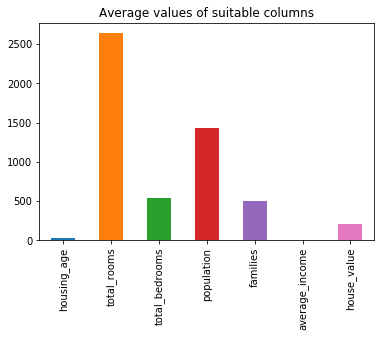

In [28]:
data_1=data.copy()
#As Total bedrooms columns has some missing values, the below line is used to fill those values with values just before blanks
data_1["total_bedrooms"].fillna(method="bfill",inplace=True)
data_1["house_value"]=data_1.house_value/1000
#As the house value average is very high, scaling is done in above step by dividing it by 1000 so that all other categories
#remain visible in the plot. The house price is now in terms of 1000's
#data_1.head()
df_mean=data_1[["housing_age","total_rooms","total_bedrooms","population","families","average_income","house_value"]].mean()
df_mean.plot(kind='bar',title='Average values of suitable columns')

3.   Visualize the differences in housing prices from the average price of housing using a bar diagram.

Text(0.5, 1.0, 'House price comparison with average price')

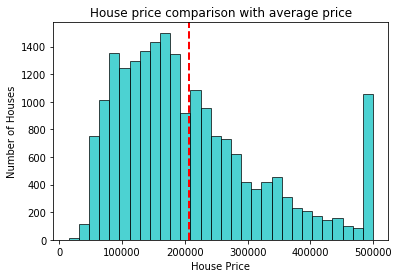

In [29]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
original_data=pd.read_csv('housing_dataset.csv')
data=original_data.copy()
House_price=data.house_value
result = plt.hist(House_price, bins=30, color='c', edgecolor='k', alpha=0.7)
plt.axvline(House_price.mean(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel("House Price")
plt.ylabel("Number of Houses")
plt.title("House price comparison with average price")

##**Part-3: File Management:**  *(6 marks: 2 question x 3 marks each)*

 

1.   Save the details of all housing blocks in a csv file having houses near oceans and  lower than the average of the housing value.

In [30]:
data_near_ocean=pd.DataFrame(original_data.loc[(original_data['ocean_proximity']=='NEAR OCEAN') & (original_data['house_value']<original_data['house_value'].mean())])
data_near_ocean.to_csv('housing_dataset_near_ocean.csv',index=None,header=True)






2.   Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.






In [31]:
data_new=pd.DataFrame(original_data,columns=['longitude','latitude','total_rooms','house_value'])
data_new.to_csv('housing_dataset_new.csv',index=None,header=True)